In [176]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [177]:
import numpy as np
import scipy as sp
import sklearn as sk
import cartopy as cp
import xarray as xr
import pandas as pd
import cftime
import dateutil
import dask
#Use the 2 lines below if the notebook has a dark theme (to make labelling visible):
from jupyterthemes import jtplot
jtplot.style(theme='grade3', context='notebook', ticks=True, grid=False)
import matplotlib.pyplot as plt
#The following code resets the default plot size so you don't have to fiddle with figsize every time"
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

In [178]:
#Need the following line to avoid hdf5 issues that prevent opening thee file
# https://stackoverflow.com/questions/49317927/errno-101-netcdf-hdf-error-when-opening-netcdf-file
%env HDF5_USE_FILE_LOCKING=FALSE

env: HDF5_USE_FILE_LOCKING=FALSE


In [179]:
def covariance(x, y, dims=None):
    return xr.dot(x - x.mean(dims), y - y.mean(dims), dims=dims) / x.count(dims)

def correlation(x, y, dims=None):
    return covariance(x, y, dims) / (x.std(dims) * y.std(dims))

# Load and Manipulate Data

In [180]:
#Load AIRI data 
from netCDF4 import Dataset
from datetime import datetime, timedelta
from netCDF4 import num2date, date2num
dataset_file = "pALLIN.nc"
airi_dat = xr.open_dataset(dataset_file, decode_times=False)
units, reference_date = airi_dat.time.attrs['units'].split('since')
airi_dat['time'] = pd.date_range(start=reference_date, periods=airi_dat.sizes['time'], freq='MS')
#This file's calendar isn't recognized when using xr.open_dataset. The above workaround is from: 
#https://stackoverflow.com/questions/55648630/how-to-decode-the-time-variable-while-using-xarray-to-load-a-netcdf-file
# "M" means "month end frequency" (see https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases)

In [181]:
precip = airi_dat['precip']

In [182]:
#Load SST data
dataset_url = "https://psl.noaa.gov/thredds/dodsC/Datasets/noaa.ersst.v5/sst.mnmean.nc"
sst_dat = xr.open_dataset(dataset_url)
sst = sst_dat['sst']

In [183]:
#Slice SST data to the same duration as precip and calculate monthly anomalies
sst_subset = sst.sel(time=slice('1871-01-30','2017-01-01'))
sst_clim = sst_subset.groupby('time.month').mean('time')
sst_anomfull = sst_subset.groupby("time.month")-sst_clim
sst_anomfull

/global/home/users/medhap02/.conda/envs/xarrayenv2/lib/python3.7/site-packages/xarray/core/nanops.py:160: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.DataArray 'sst' (time: 1752, lat: 89, lon: 180)>
array([[[1.788139e-06, 1.788139e-06, ..., 1.788139e-06, 1.788139e-06],
        [1.788139e-06, 1.788139e-06, ..., 1.788139e-06, 1.788139e-06],
        ...,
        [         nan,          nan, ...,          nan,          nan],
        [         nan,          nan, ...,          nan,          nan]],

       [[1.788139e-06, 1.788139e-06, ..., 1.788139e-06, 1.788139e-06],
        [1.788139e-06, 1.788139e-06, ..., 1.788139e-06, 1.788139e-06],
        ...,
        [         nan,          nan, ...,          nan,          nan],
        [         nan,          nan, ...,          nan,          nan]],

       ...,

       [[3.152323e-02, 2.609873e-02, ..., 2.140296e-02, 3.102016e-02],
        [2.697122e-02, 1.542413e-02, ..., 1.046002e-02, 2.427316e-02],
        ...,
        [         nan,          nan, ...,          nan,          nan],
        [         nan,          nan, ...,          nan,          nan]],

       [[1.788139e-06, 1.788139e-

In [184]:
sst_subset1 = sst_anomfull.sel(time=slice('1900-01-01','1901-12-31'))
sst_subset2 = sst_anomfull.sel(time=slice('1903-01-01','1906-12-31'))
sst_subset3 = sst_anomfull.sel(time=slice('1908-01-01','1911-12-31'))
sst_subset4 = sst_anomfull.sel(time=slice('1913-01-01','1913-12-31'))
sst_subset5 = sst_anomfull.sel(time=slice('1915-01-01','1918-12-31'))
sst_subset6 = sst_anomfull.sel(time=slice('1920-01-01','1921-12-31'))
sst_subset7 = sst_anomfull.sel(time=slice('1923-01-01','1927-12-31'))
sst_subset8 = sst_anomfull.sel(time=slice('1929-01-01','1931-12-31'))
sst_subset9 = sst_anomfull.sel(time=slice('1934-01-01','1939-12-31'))
sst_subset10 = sst_anomfull.sel(time=slice('1941-01-01','1948-12-31'))
sst_subset11 = sst_anomfull.sel(time=slice('1951-01-01','1955-12-31'))
sst_subset12 = sst_anomfull.sel(time=slice('1957-01-01','1958-12-31'))
sst_subset13 = sst_anomfull.sel(time=slice('1960-01-01','1962-12-31'))
sst_subset13 = sst_anomfull.sel(time=slice('1964-01-01','1965-12-31'))
sst_subset14 = sst_anomfull.sel(time=slice('1967-01-01','1971-12-31'))
sst_subset15 = sst_anomfull.sel(time=slice('1973-01-01','1976-12-31'))
sst_subset16 = sst_anomfull.sel(time=slice('1978-01-01','1979-12-31'))
sst_subset17 = sst_anomfull.sel(time=slice('1981-01-01','1982-12-31'))
sst_subset18 = sst_anomfull.sel(time=slice('1984-01-01','1991-12-31'))
sst_subset19 = sst_anomfull.sel(time=slice('1993-01-01','1998-12-31'))
sst_subset20 = sst_anomfull.sel(time=slice('2000-01-01','2002-12-31'))
sst_subset21 = sst_anomfull.sel(time=slice('2004-01-01','2006-12-31'))
sst_subset22 = sst_anomfull.sel(time=slice('2008-01-01','2010-12-31'))
sst_subset23 = sst_anomfull.sel(time=slice('2012-01-01','2015-12-31'))

sst_anomtemp = xr.merge([sst_subset1, sst_subset2, sst_subset3, sst_subset4, sst_subset5, 
                   sst_subset6, sst_subset7, sst_subset8, sst_subset9, sst_subset10, 
                   sst_subset11, sst_subset12, sst_subset13, sst_subset14, sst_subset15, 
                   sst_subset16, sst_subset17, sst_subset18, sst_subset19, sst_subset20, 
                   sst_subset21, sst_subset22, sst_subset23])
#sst_anom = xr.Dataset.to_array(sst_anomtemp).drop('variable')
print(sst_anomtemp)
sst_anom = sst_anomtemp['sst']
#1902, 1907, 1912, 1914, 1919, 1922, 1928, 1932, 1933, 1940
#1949, 1950, 1956, 1959, 1963, 1966, 1972, 1977, 1980, 1983
#1992, 1999, 2003, 2007, 2011

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 1056)
Coordinates:
  * time     (time) datetime64[ns] 1900-01-01 1900-02-01 ... 2015-12-01
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
    month    (time) float64 1.0 2.0 3.0 4.0 5.0 6.0 ... 8.0 9.0 10.0 11.0 12.0
Data variables:
    sst      (time, lat, lon) float32 1.7881393e-06 1.7881393e-06 ... nan nan


In [185]:
#Load SLP data
dataset_url = "/global/scratch/medhap02/ISMData/prmsl.mon.mean.nc"
slp_dat = xr.open_dataset(dataset_url)
slp = slp_dat['prmsl']

In [186]:
#Slice SLP data to the same duration as precip and calculate monthly anomalies
slp_subset = slp.sel(time=slice('1871-01-01','2015-12-31'))
slp_clim = slp_subset.groupby('time.month').mean('time')
slp_anomfull = slp_subset.groupby("time.month")-slp_clim
slp_anomfull

<xarray.DataArray 'prmsl' (time: 1740, lat: 181, lon: 360)>
array([[[  114.765625,   114.765625, ...,   114.765625,   114.765625],
        [   94.78125 ,    94.46875 , ...,    95.359375,    95.03125 ],
        ...,
        [  293.65625 ,   293.95312 , ...,   293.20312 ,   293.4297  ],
        [  288.66406 ,   288.66406 , ...,   288.66406 ,   288.66406 ]],

       [[   75.84375 ,    75.84375 , ...,    75.84375 ,    75.84375 ],
        [   67.66406 ,    68.02344 , ...,    66.85156 ,    67.24219 ],
        ...,
        [  587.2969  ,   587.52344 , ...,   586.9219  ,   587.0781  ],
        [  581.14844 ,   581.14844 , ...,   581.14844 ,   581.14844 ]],

       ...,

       [[ -876.5703  ,  -876.5703  , ...,  -876.5703  ,  -876.5703  ],
        [ -937.10156 ,  -936.8594  , ...,  -937.625   ,  -937.3906  ],
        ...,
        [-1008.4375  , -1008.8906  , ..., -1007.5625  , -1007.9922  ],
        [-1047.0938  , -1047.0938  , ..., -1047.0938  , -1047.0938  ]],

       [[ -525.5     ,  -525.5

In [187]:
slp_subset1 = slp_anomfull.sel(time=slice('1900-01-01','1901-12-31'))
slp_subset2 = slp_anomfull.sel(time=slice('1903-01-01','1906-12-31'))
slp_subset3 = slp_anomfull.sel(time=slice('1908-01-01','1911-12-31'))
slp_subset4 = slp_anomfull.sel(time=slice('1913-01-01','1913-12-31'))
slp_subset5 = slp_anomfull.sel(time=slice('1915-01-01','1918-12-31'))
slp_subset6 = slp_anomfull.sel(time=slice('1920-01-01','1921-12-31'))
slp_subset7 = slp_anomfull.sel(time=slice('1923-01-01','1927-12-31'))
slp_subset8 = slp_anomfull.sel(time=slice('1929-01-01','1931-12-31'))
slp_subset9 = slp_anomfull.sel(time=slice('1934-01-01','1939-12-31'))
slp_subset10 = slp_anomfull.sel(time=slice('1941-01-01','1948-12-31'))
slp_subset11 = slp_anomfull.sel(time=slice('1951-01-01','1955-12-31'))
slp_subset12 = slp_anomfull.sel(time=slice('1957-01-01','1958-12-31'))
slp_subset13 = slp_anomfull.sel(time=slice('1960-01-01','1962-12-31'))
slp_subset13 = slp_anomfull.sel(time=slice('1964-01-01','1965-12-31'))
slp_subset14 = slp_anomfull.sel(time=slice('1967-01-01','1971-12-31'))
slp_subset15 = slp_anomfull.sel(time=slice('1973-01-01','1976-12-31'))
slp_subset16 = slp_anomfull.sel(time=slice('1978-01-01','1979-12-31'))
slp_subset17 = slp_anomfull.sel(time=slice('1981-01-01','1982-12-31'))
slp_subset18 = slp_anomfull.sel(time=slice('1984-01-01','1991-12-31'))
slp_subset19 = slp_anomfull.sel(time=slice('1993-01-01','1998-12-31'))
slp_subset20 = slp_anomfull.sel(time=slice('2000-01-01','2002-12-31'))
slp_subset21 = slp_anomfull.sel(time=slice('2004-01-01','2006-12-31'))
slp_subset22 = slp_anomfull.sel(time=slice('2008-01-01','2010-12-31'))
slp_subset23 = slp_anomfull.sel(time=slice('2012-01-01','2015-12-31'))

slp_anomtemp = xr.merge([slp_subset1, slp_subset2, slp_subset3, slp_subset4, slp_subset5, 
                   slp_subset6, slp_subset7, slp_subset8, slp_subset9, slp_subset10, 
                   slp_subset11, slp_subset12, slp_subset13, slp_subset14, slp_subset15, 
                   slp_subset16, slp_subset17, slp_subset18, slp_subset19, slp_subset20, 
                   slp_subset21, slp_subset22, slp_subset23])
#slp_anom = xr.Dataset.to_array(slp_anomtemp).drop('variable')
print(slp_anomtemp)
slp_anom = slp_anomtemp['prmsl']
#1902, 1907, 1912, 1914, 1919, 1922, 1928, 1932, 1933, 1940
#1949, 1950, 1956, 1959, 1963, 1966, 1972, 1977, 1980, 1983
#1992, 1999, 2003, 2007, 2011

<xarray.Dataset>
Dimensions:  (lat: 181, lon: 360, time: 1056)
Coordinates:
  * time     (time) datetime64[ns] 1900-01-01 1900-02-01 ... 2015-12-01
  * lat      (lat) float32 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
    month    (time) float64 1.0 2.0 3.0 4.0 5.0 6.0 ... 8.0 9.0 10.0 11.0 12.0
Data variables:
    prmsl    (time, lat, lon) float32 24.570312 24.570312 ... -411.48438


In [188]:
#Load MSE data
dataset_url = "MSE_20thcentury.nc"
mse_dat1 = xr.open_dataset('/global/scratch/medhap02/ISMData/MSE_20thcentury.nc')
mse_dat = mse_dat1.rename({'LON':'lon', 'LAT':'lat','TIME':'time'})
mse = mse_dat['MSE']
print(mse_dat)

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 181, lon: 360, time: 2160)
Coordinates:
  * lon        (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * lat        (lat) float64 -90.0 -89.0 -88.0 -87.0 ... 87.0 88.0 89.0 90.0
  * time       (time) datetime64[ns] 1836-01-01 1836-02-01 ... 2015-12-01
Dimensions without coordinates: bnds
Data variables:
    TIME_bnds  (time, bnds) datetime64[ns] ...
    MSE        (time, lat, lon) float64 ...
    DMSEDT     (time, lat, lon) float64 ...
Attributes:
    history:      PyFerret V7.43 (optimized) 14-May-20
    Conventions:  CF-1.6


In [189]:
#Slice MSE data to the same duration as precip and calculate monthly anomalies
mse_subset = mse.sel(time=slice('1871-01-30','2017-01-01'))
mse_clim = mse_subset.groupby('time.month').mean('time')
mse_anomfull = mse_subset.groupby("time.month")-mse_clim
mse_anomfull

<xarray.DataArray 'MSE' (time: 1739, lat: 181, lon: 360)>
array([[[ -437.976186,  -437.976186, ...,  -437.976186,  -437.976186],
        [ -357.903304,  -357.881208, ...,  -348.426553,  -351.846723],
        ...,
        [-4136.464814, -4142.140899, ..., -4125.058225, -4129.258011],
        [-3946.385781, -3946.385781, ..., -3946.385781, -3946.385781]],

       [[ -685.706864,  -685.706864, ...,  -685.706864,  -685.706864],
        [ -523.262003,  -522.176401, ...,  -528.206152,  -525.088336],
        ...,
        [-2774.219152, -2771.776149, ..., -2769.221152, -2770.293549],
        [-2662.830975, -2662.830975, ..., -2662.830975, -2662.830975]],

       ...,

       [[ 2257.7285  ,  2257.7285  , ...,  2257.7285  ,  2257.7285  ],
        [ 2691.46434 ,  2695.995047, ...,  2682.928563,  2688.836707],
        ...,
        [ 3071.988646,  3092.121979, ...,  3027.33813 ,  3049.99822 ],
        [ 3156.791382,  3156.791382, ...,  3156.791382,  3156.791382]],

       [[  864.856915,   864.856

In [190]:
mse_subset1 = mse_anomfull.sel(time=slice('1900-01-01','1901-12-31'))
mse_subset2 = mse_anomfull.sel(time=slice('1903-01-01','1906-12-31'))
mse_subset3 = mse_anomfull.sel(time=slice('1908-01-01','1911-12-31'))
mse_subset4 = mse_anomfull.sel(time=slice('1913-01-01','1913-12-31'))
mse_subset5 = mse_anomfull.sel(time=slice('1915-01-01','1918-12-31'))
mse_subset6 = mse_anomfull.sel(time=slice('1920-01-01','1921-12-31'))
mse_subset7 = mse_anomfull.sel(time=slice('1923-01-01','1927-12-31'))
mse_subset8 = mse_anomfull.sel(time=slice('1929-01-01','1931-12-31'))
mse_subset9 = mse_anomfull.sel(time=slice('1934-01-01','1939-12-31'))
mse_subset10 = mse_anomfull.sel(time=slice('1941-01-01','1948-12-31'))
mse_subset11 = mse_anomfull.sel(time=slice('1951-01-01','1955-12-31'))
mse_subset12 = mse_anomfull.sel(time=slice('1957-01-01','1958-12-31'))
mse_subset13 = mse_anomfull.sel(time=slice('1960-01-01','1962-12-31'))
mse_subset13 = mse_anomfull.sel(time=slice('1964-01-01','1965-12-31'))
mse_subset14 = mse_anomfull.sel(time=slice('1967-01-01','1971-12-31'))
mse_subset15 = mse_anomfull.sel(time=slice('1973-01-01','1976-12-31'))
mse_subset16 = mse_anomfull.sel(time=slice('1978-01-01','1979-12-31'))
mse_subset17 = mse_anomfull.sel(time=slice('1981-01-01','1982-12-31'))
mse_subset18 = mse_anomfull.sel(time=slice('1984-01-01','1991-12-31'))
mse_subset19 = mse_anomfull.sel(time=slice('1993-01-01','1998-12-31'))
mse_subset20 = mse_anomfull.sel(time=slice('2000-01-01','2002-12-31'))
mse_subset21 = mse_anomfull.sel(time=slice('2004-01-01','2006-12-31'))
mse_subset22 = mse_anomfull.sel(time=slice('2008-01-01','2010-12-31'))
mse_subset23 = mse_anomfull.sel(time=slice('2012-01-01','2015-12-31'))

mse_anomtemp = xr.merge([mse_subset1, mse_subset2, mse_subset3, mse_subset4, mse_subset5, 
                   mse_subset6, mse_subset7, mse_subset8, mse_subset9, mse_subset10, 
                   mse_subset11, mse_subset12, mse_subset13, mse_subset14, mse_subset15, 
                   mse_subset16, mse_subset17, mse_subset18, mse_subset19, mse_subset20, 
                   mse_subset21, mse_subset22, mse_subset23])
#mse_anom = xr.Dataset.to_array(mse_anomtemp).drop('variable')
print(mse_anomtemp)
mse_anom = mse_anomtemp['MSE']
#1902, 1907, 1912, 1914, 1919, 1922, 1928, 1932, 1933, 1940
#1949, 1950, 1956, 1959, 1963, 1966, 1972, 1977, 1980, 1983
#1992, 1999, 2003, 2007, 2011

<xarray.Dataset>
Dimensions:  (lat: 181, lon: 360, time: 1056)
Coordinates:
  * time     (time) datetime64[ns] 1900-01-01 1900-02-01 ... 2015-12-01
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
    month    (time) float64 1.0 2.0 3.0 4.0 5.0 6.0 ... 8.0 9.0 10.0 11.0 12.0
Data variables:
    MSE      (time, lat, lon) float64 -436.0 -436.0 ... 1.634e+03 1.634e+03


In [191]:
#Get precip anomalies
precip_clim = precip.groupby("time.month").mean("time")
precip_anomfull = precip.groupby("time.month") - precip_clim

In [192]:
precip_subset1 = precip_anomfull.sel(time=slice('1900-01-01','1901-12-31'))
precip_subset2 = precip_anomfull.sel(time=slice('1903-01-01','1906-12-31'))
precip_subset3 = precip_anomfull.sel(time=slice('1908-01-01','1911-12-31'))
precip_subset4 = precip_anomfull.sel(time=slice('1913-01-01','1913-12-31'))
precip_subset5 = precip_anomfull.sel(time=slice('1915-01-01','1918-12-31'))
precip_subset6 = precip_anomfull.sel(time=slice('1920-01-01','1921-12-31'))
precip_subset7 = precip_anomfull.sel(time=slice('1923-01-01','1927-12-31'))
precip_subset8 = precip_anomfull.sel(time=slice('1929-01-01','1931-12-31'))
precip_subset9 = precip_anomfull.sel(time=slice('1934-01-01','1939-12-31'))
precip_subset10 = precip_anomfull.sel(time=slice('1941-01-01','1948-12-31'))
precip_subset11 = precip_anomfull.sel(time=slice('1951-01-01','1955-12-31'))
precip_subset12 = precip_anomfull.sel(time=slice('1957-01-01','1958-12-31'))
precip_subset13 = precip_anomfull.sel(time=slice('1960-01-01','1962-12-31'))
precip_subset13 = precip_anomfull.sel(time=slice('1964-01-01','1965-12-31'))
precip_subset14 = precip_anomfull.sel(time=slice('1967-01-01','1971-12-31'))
precip_subset15 = precip_anomfull.sel(time=slice('1973-01-01','1976-12-31'))
precip_subset16 = precip_anomfull.sel(time=slice('1978-01-01','1979-12-31'))
precip_subset17 = precip_anomfull.sel(time=slice('1981-01-01','1982-12-31'))
precip_subset18 = precip_anomfull.sel(time=slice('1984-01-01','1991-12-31'))
precip_subset19 = precip_anomfull.sel(time=slice('1993-01-01','1998-12-31'))
precip_subset20 = precip_anomfull.sel(time=slice('2000-01-01','2002-12-31'))
precip_subset21 = precip_anomfull.sel(time=slice('2004-01-01','2006-12-31'))
precip_subset22 = precip_anomfull.sel(time=slice('2008-01-01','2010-12-31'))
precip_subset23 = precip_anomfull.sel(time=slice('2012-01-01','2015-12-31'))

precip_anom = xr.merge([precip_subset1, precip_subset2, precip_subset3, precip_subset4, precip_subset5, 
                   precip_subset6, precip_subset7, precip_subset8, precip_subset9, precip_subset10, 
                   precip_subset11, precip_subset12, precip_subset13, precip_subset14, precip_subset15, 
                   precip_subset16, precip_subset17, precip_subset18, precip_subset19, precip_subset20, 
                   precip_subset21, precip_subset22, precip_subset23])
precip_anomtemp = xr.Dataset.to_array(precip_anom)
precip_anom = precip_anom['precip']
print(precip_anom)
#1902, 1907, 1912, 1914, 1919, 1922, 1928, 1932, 1933, 1940
#1949, 1950, 1956, 1959, 1963, 1966, 1972, 1977, 1980, 1983
#1992, 1999, 2003, 2007, 2011

<xarray.DataArray 'precip' (time: 1056)>
array([ -9.166439,   4.535616,  -5.745206, ..., -44.439735, -40.930824,
        13.444523], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1900-01-01 1900-02-01 ... 2015-12-01
    month    (time) float64 1.0 2.0 3.0 4.0 5.0 6.0 ... 8.0 9.0 10.0 11.0 12.0


In [232]:
precip_full = precip_anom.sel(time=slice('1900-01-01','2015-12-31'))
#precip_full = precip
junes = np.arange(5,1056,12)
julys = np.arange(6,1056,12)
augusts = np.arange(7,1056, 12)
septembers = np.arange(8,1056,12)
precip_june = precip_full[junes]
precip_july = precip_full[julys]
precip_august = precip_full[augusts]
precip_september = precip_full[septembers]

precip_july.time.data = precip_june.time.data
precip_august.time.data = precip_june.time.data
precip_september.time.data = precip_june.time.data

precip_jjas = (precip_june + precip_july + precip_august + precip_september)

# Building Predictors

In [256]:
#EP-ENSOpredictor
#(30n-30s, 155-175e)
#(10n-10s, 115-80w)

#DSST1
latrange1 = sst_anom.sel(lat = slice(30, -30)).lat
weights1 = np.cos(latrange1*np.pi/180)

marchdata1 = sst_anom.sel(lat = slice(30, -30), lon = slice(155, 175), time = (sst_anom['time.month']==3))
marchSST1 = marchdata1.sel(time = slice('1900-03-01', '2015-03-01'))
marchmean1 = (marchSST1*weights1).mean({'lon', 'lat'})/weights1.mean()

maydata1 = sst_anom.sel(lat = slice(30, -30), lon = slice(155, 175), time = (sst_anom['time.month']==5))
maySST1 = maydata1.sel(time = slice('1900-05-01', '2015-05-01'))
maymean1 = (maySST1*weights1).mean({'lon', 'lat'})/weights1.mean()

marchmean1.time.data = maymean1.time.data
DSST1 = maymean1 - marchmean1

#DSST2
latrange2 = sst_anom.sel(lat = slice(10, -10)).lat
weights2 = np.cos(latrange2*np.pi/180)

marchdata2 = sst_anom.sel(lat = slice(10, -10), lon = slice(245, 280), time = (sst_anom['time.month']==3))
marchSST2 = marchdata2.sel(time = slice('1900-03-01', '2015-03-01'))
marchmean2 = (marchSST2*weights2).mean({'lon', 'lat'})/weights2.mean()

maydata2 = sst_anom.sel(lat = slice(10, -10), lon = slice(245, 280), time = (sst_anom['time.month']==5))
maySST2 = maydata2.sel(time = slice('1900-05-01', '2015-05-01'))
maymean2 = (maySST2*weights2).mean({'lon', 'lat'})/weights2.mean()

marchmean2.time.data = maymean2.time.data
DSST2 = (maymean2 - marchmean2)

EPTinitial = DSST1 - DSST2
#print(EPTinitial)
EPTstd = EPTinitial.std()
EPTmean = EPTinitial.mean()
EPTnew = (EPTinitial - EPTmean)/EPTstd

print("EPT mean", EPTmean)
print("EPT std", EPTstd)

EPT mean <xarray.DataArray ()>
array(-0.030348, dtype=float32)
EPT std <xarray.DataArray ()>
array(0.514143, dtype=float32)


In [257]:
print(EPTnew)

<xarray.DataArray (time: 88)>
array([ 0.297432, -0.319612,  1.032587, -1.616898, -1.797158,  2.540109,
        0.537675, -0.358141,  0.364645, -1.525626,  0.0676  , -0.42359 ,
        0.6601  , -0.958777, -1.479854,  0.658664, -0.907403, -1.074267,
        0.143604,  0.427609,  0.388416, -0.384667, -0.247867, -0.44527 ,
        1.342018,  0.534773, -1.597306, -0.094783,  0.492786,  0.998168,
       -1.623247, -0.399902,  1.68427 , -0.727575,  0.310104, -0.77136 ,
       -0.036985,  1.894478,  2.467264, -0.761732,  1.339039, -0.109728,
        1.562739,  0.766331, -0.531303, -0.200212,  1.793724, -1.758997,
       -0.599616, -0.049605, -0.800348,  0.201347,  0.418059,  1.535974,
       -0.706784,  0.690212, -0.88298 ,  0.714634, -1.410141,  0.445903,
       -0.928172,  1.313385,  0.335721,  0.20977 , -0.186825,  0.850827,
        0.324238, -0.71012 ,  0.043715, -0.693239, -0.347612,  0.804691,
        1.352873, -2.195137,  0.671975, -0.45006 ,  0.690443, -0.160211,
        0.85276 , -0.

In [258]:
#CP-ENSOpredictor
#(55-5s, 175e-155w)

#DSST
latrange1 = sst_anom.sel(lat = slice(-5, -55)).lat
weights1 = np.cos(latrange1*np.pi/180)

aprildata1 = sst_anom.sel(lat = slice(-5, -55), lon = slice(175, 205), time = (sst_anom['time.month']==4))
aprilSST1 = aprildata1.sel(time = slice('1900-04-01', '2015-04-01'))
aprilmean1 = (aprilSST1*weights1).mean({'lon', 'lat'})/weights1.mean()

maydata1 = sst_anom.sel(lat = slice(-5, -55), lon = slice(175, 205), time = (sst_anom['time.month']==5))
maySST1 = maydata1.sel(time = slice('1900-05-01', '2015-05-01'))
maymean1 = (maySST1*weights1).mean({'lon', 'lat'})/weights1.mean() 

aprilmean1.time.data = maymean1.time.data

CPTinitial = maymean1 - aprilmean1
#print(CPTinitial)
CPTstd = CPTinitial.std()
CPTmean = CPTinitial.mean()
CPTnew = (CPTinitial - CPTmean)/CPTstd

print("CPT mean", CPTmean)
print("CPT std", CPTstd)

CPT mean <xarray.DataArray ()>
array(-0.004538, dtype=float32)
CPT std <xarray.DataArray ()>
array(0.152151, dtype=float32)


In [259]:
print(CPTnew)

<xarray.DataArray (time: 88)>
array([ 0.413217, -1.412964,  0.18862 , -2.425838, -3.147323, -1.376669,
       -0.267006,  0.612157, -0.192166, -0.676915,  0.821784, -1.016349,
        0.295765,  3.117042,  0.491891, -0.238895,  0.157547,  0.023138,
       -0.499815,  0.83123 ,  0.626021,  0.885561,  0.130674, -0.307108,
        1.194109,  0.664761, -0.931261, -1.636097, -0.591374, -0.533841,
        1.510118,  0.551406,  1.524788,  0.120483,  0.776971, -1.789856,
        1.148034,  0.173274, -0.014265, -0.10438 , -0.744044,  0.688941,
       -0.173456,  1.24826 ,  1.372423, -0.897227,  1.586309, -0.7768  ,
       -0.347138,  1.005534, -0.708128,  0.772665,  0.725804, -0.292203,
       -0.484095,  0.277428, -0.823857,  1.761318, -0.940902, -0.196139,
       -0.882469, -0.715752,  0.15835 , -1.34445 , -1.414678, -0.159447,
        0.913335,  1.914355, -0.691284,  0.222586, -0.113775, -0.125853,
       -1.123544, -1.491947,  0.978121,  0.060592,  0.453439, -1.429334,
        0.762192,  0.

In [260]:
#mega-ENSOpredictor
#(20-45s, 145-80w)
#(15-35n, 170-125w)
#(0-20n, 40-120e)

#NPcalculation
latrange1 = slp_anom.sel(lat = slice(-45, -20)).lat
weights1 = np.cos(latrange1*np.pi/180)

marchdata1 = slp_anom.sel(lat = slice(-45, -20), lon = slice(215, 260), time = (slp_anom['time.month']==3))
marchSLP1 = marchdata1.sel(time=slice('1900-03-01','2015-03-01'))
marchmean1 = ((marchSLP1*weights1).mean({'lon', 'lat'})/weights1.mean())

aprildata1 = slp_anom.sel(lat = slice(-45, -20), lon = slice(215, 260), time = (slp_anom['time.month']==4))
aprilSLP1 = aprildata1.sel(time=slice('1900-04-01','2015-04-01'))
aprilmean1 = ((aprilSLP1*weights1).mean({'lon', 'lat'})/weights1.mean())

maydata1 = slp_anom.sel(lat = slice(-45, -20), lon = slice(215, 260), time = (slp_anom['time.month']==5))
maySLP1 = maydata1.sel(time = slice('1900-05-01', '2015-05-01'))
maymean1 = ((maySLP1*weights1).mean({'lon', 'lat'})/weights1.mean())

marchmean1.time.data = maymean1.time.data
aprilmean1.time.data = maymean1.time.data
NP = ((marchmean1 + aprilmean1 + maymean1)/3)

#SPcalculation
latrange2 = slp_anom.sel(lat = slice(15, 35)).lat
weights2 = np.cos(latrange2*np.pi/180)

marchdata2 = slp_anom.sel(lat = slice(15, 35), lon = slice(190, 235), time = (slp_anom['time.month']==3))
marchSLP2 = marchdata2.sel(time = slice('1900-03-01', '2015-03-01'))
marchmean2 = ((marchSLP2*weights2).mean({'lon', 'lat'})/weights2.mean())

aprildata2 = slp_anom.sel(lat = slice(15, 35), lon = slice(190, 235), time = (slp_anom['time.month']==4))
aprilSLP2 = aprildata2.sel(time = slice('1900-04-01', '2015-04-01'))
aprilmean2 = ((aprilSLP2*weights2).mean({'lon', 'lat'})/weights2.mean())

maydata2 = slp_anom.sel(lat = slice(15, 35), lon = slice(190, 235), time = (slp_anom['time.month']==5))
maySLP2 = maydata2.sel(time = slice('1900-05-01', '2015-05-01'))
maymean2 = ((maySLP2*weights2).mean({'lon', 'lat'})/weights2.mean())

marchmean2.time.data = maymean2.time.data
aprilmean2.time.data = maymean2.time.data
SP = ((marchmean2 + aprilmean2 + maymean2)/3)

NParea = (25*weights1.mean() * 45)
SParea = (20*weights2.mean() * 45)
Pacific = ((NP * NParea) + (SP * SParea))/(NParea + SParea)

#EQindia
latrange3 = slp_anom.sel(lat = slice(0, 20)).lat
weights3 = np.cos(latrange3*np.pi/180)

marchdata3 = slp_anom.sel(lat = slice(0, 20), lon = slice(40, 120), time = (slp_anom['time.month']==3))
marchSLP3 = marchdata3.sel(time = slice('1900-03-01', '2015-03-01'))
marchmean3 = (marchSLP3*weights3).mean({'lon', 'lat'})/weights3.mean()

aprildata3 = slp_anom.sel(lat = slice(0, 20), lon = slice(40, 120), time = (slp_anom['time.month']==4))
aprilSLP3 = aprildata3.sel(time = slice('1900-04-01', '2015-04-01'))
aprilmean3 = (aprilSLP3*weights3).mean({'lon', 'lat'})/weights3.mean()

maydata3 = slp_anom.sel(lat = slice(0, 20), lon = slice(40, 120), time = (slp_anom['time.month']==5))
maySLP3 = maydata3.sel(time = slice('1900-05-01', '2015-05-01'))
maymean3 = (maySLP3*weights3).mean({'lon', 'lat'})/weights3.mean()

marchmean3.time.data = maymean3.time.data
aprilmean3.time.data = maymean3.time.data

EQindia = (marchmean3 + aprilmean3 + maymean3)/3

PSHinitial = Pacific - EQindia
#print(PSHinitial)
PSHstd = PSHinitial.std()
PSHmean = PSHinitial.mean()
PSHnew = (PSHinitial - PSHmean)/PSHstd

print("PSH mean", PSHmean)
print("PSH std", PSHstd)

PSH mean <xarray.DataArray ()>
array(-2.801919)
PSH std <xarray.DataArray ()>
array(118.435752)


In [261]:
print(PSHnew)

<xarray.DataArray (time: 88)>
array([-1.120807,  0.084838, -0.936084, -0.07203 , -2.295266, -1.09368 ,
       -2.722701, -0.054504, -0.156472, -1.526965, -0.036367, -2.388385,
       -2.130179,  1.50914 , -0.295717, -0.842546, -0.155473, -0.190177,
        0.158499,  0.254744, -1.251174,  0.93433 , -0.076241, -0.334943,
       -0.63977 ,  0.327329,  0.012084,  0.217266,  0.866063,  1.934424,
        0.306923,  0.440904,  1.279344, -0.274565,  0.949652,  1.621221,
        1.022924, -0.11969 , -0.7157  , -1.186119,  0.127887, -0.343703,
       -0.353022,  1.42855 , -0.687498, -1.083813,  1.393163, -0.298864,
        0.730745, -0.11504 ,  0.143986,  0.887824,  0.92995 ,  0.739796,
        0.60647 ,  1.416272,  0.546871,  0.287919, -0.999398, -0.394444,
       -0.546977,  1.286055,  1.302056, -0.220975, -1.264624,  1.266578,
        0.408681,  0.401241, -0.292271, -1.523896, -0.077083, -0.843714,
        0.315159, -2.118562,  0.137302,  2.203169,  1.114905, -0.077155,
        0.237667, -0.

In [262]:
#MSE
#(0-25n, 45-70e)
#(20-40n, 70-90e)
#(45-70n, 95e-150w)

#MSEleft
latrange1 = mse_anom.sel(lat = slice(0, 25)).lat
weights1 = np.cos(latrange1*np.pi/180)

marchdata1 = mse_anom.sel(lat = slice(0, 25), lon = slice(45, 70), time = (mse_anom['time.month']==3))
marchMSE1 = marchdata1.sel(time = slice('1900-03-01', '2015-03-01'))
marchmean1 = (marchMSE1*weights1).mean({'lon', 'lat'})/weights1.mean()

maydata1 = mse_anom.sel(lat = slice(0, 25), lon = slice(45, 70), time = (mse_anom['time.month']==5))
mayMSE1 = maydata1.sel(time = slice('1900-05-01', '2015-05-01'))
maymean1 = (mayMSE1*weights1).mean({'lon', 'lat'})/weights1.mean()

marchmean1.time.data = maymean1.time.data
MSEleft = maymean1 - marchmean1

#MSEright
latrange2 = mse_anom.sel(lat = slice(20, 40)).lat
weights2 = np.cos(latrange2*np.pi/180)

marchdata2 = mse_anom.sel(lat = slice(20, 40), lon = slice(70, 90), time = (mse_anom['time.month']==3))
marchMSE2 = marchdata2.sel(time = slice('1900-03-01', '2015-03-01'))
marchmean2 = ((marchMSE2*weights2).mean({'lon', 'lat'})/weights2.mean())

maydata2 = mse_anom.sel(lat = slice(20, 40), lon = slice(70, 90), time = (mse_anom['time.month']==5))
mayMSE2 = maydata2.sel(time = slice('1900-05-01', '2015-05-01'))
maymean2 = ((mayMSE2*weights2).mean({'lon', 'lat'})/weights2.mean())

marchmean2.time.data = maymean2.time.data
MSEright = maymean2 - marchmean2

#MSERussia
latrange3 = mse_anom.sel(lat = slice(45, 70)).lat
weights3 = np.cos(latrange3*np.pi/180)

marchdata3 = mse_anom.sel(lat = slice(45, 70), lon = slice(95, 210), time = (mse_anom['time.month']==3))
marchMSE3 = marchdata3.sel(time = slice('1900-03-01', '2015-03-01'))
marchmean3 = (marchMSE3*weights3).mean({'lon', 'lat'})/weights3.mean()

maydata3 = mse_anom.sel(lat = slice(45, 70), lon = slice(95, 210), time = (mse_anom['time.month']==5))
mayMSE3 = maydata3.sel(time = slice('1900-05-01', '2015-05-01'))
maymean3 = (mayMSE3*weights3).mean({'lon', 'lat'})/weights3.mean()

marchmean3.time.data = maymean3.time.data
MSErussia = maymean3 - marchmean3

Leftarea = (25*weights1.mean() * 25)
Rightarea = (20*weights2.mean() * 20)
Russiaarea = (25*weights2.mean() * 15)
MSEinitial = ((MSEleft * Leftarea) + (MSEright * Rightarea) + (MSErussia * Russiaarea))/(Leftarea + Rightarea + Russiaarea)
#print(MSEinitial)
MSEstd = MSEinitial.std()
MSEmean = MSEinitial.mean()
MSEnew = (MSEinitial - MSEmean)/MSEstd

print("MSE mean", MSEmean)
print("MSE std", MSEstd)

MSE mean <xarray.DataArray ()>
array(9.087073)
MSE std <xarray.DataArray ()>
array(1370.256777)


In [263]:
print(MSEnew)

<xarray.DataArray (time: 88)>
array([-1.246368e+00, -7.325898e-01, -1.444614e-01, -1.446603e+00,
       -9.845979e-02,  1.033595e-01,  2.258152e-01, -7.907559e-04,
       -3.919780e-01, -1.098968e+00,  2.915593e-01,  2.563477e-01,
       -1.453624e+00, -1.479712e+00, -1.504591e-01, -1.764262e+00,
       -2.432535e-01, -1.378350e+00, -5.222729e-01,  4.098937e-01,
       -8.464924e-01,  1.497652e+00,  1.930288e-01, -6.872415e-01,
       -8.467378e-01,  6.587007e-01, -9.095951e-01,  1.098199e+00,
        1.337829e+00,  1.021600e+00, -4.728730e-01,  2.426730e-02,
       -4.039122e-01, -1.621664e+00, -1.778630e-01,  1.189668e+00,
        1.715331e+00,  1.257968e-01,  2.179566e-01, -2.083191e-01,
       -1.827680e-01, -8.147489e-01, -8.316997e-01, -8.543665e-01,
        3.245640e-01, -5.403659e-01, -5.716350e-01, -2.140544e-01,
       -8.750809e-01, -2.013457e+00, -1.648156e-01,  7.740328e-01,
        1.760908e+00,  1.473913e+00, -7.868873e-02,  8.494273e-01,
        3.659954e-01,  9.182117e

# Cross Validation

In [264]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

In [265]:
Ydata = (precip_jjas - precip_jjas.mean())/precip_jjas.std()
Xtrain = []
for x in range(88):
    Xtrain.append(float(EPTnew[x]))
    Xtrain.append(float(CPTnew[x]))
    Xtrain.append(float(PSHnew[x]))
    Xtrain.append(float(MSEnew[x]))
Xtrainarray = np.array([Xtrain])
Xdata = Xtrainarray.reshape(-1,4)

In [266]:
EPTfit = np.array(EPTnew).reshape(-1, 1)
CPTfit = np.array(CPTnew).reshape(-1, 1)
PSHfit = np.array(PSHnew).reshape(-1, 1)
MSEfit = np.array(MSEnew).reshape(-1, 1)

lnregressor = LinearRegression()
lnregressor.fit(EPTfit, Ydata)
print("EPT new", lnregressor.coef_[0])
lnregressor.fit(CPTfit, Ydata)
print("CPT new", lnregressor.coef_[0])
lnregressor.fit(PSHfit, Ydata)
print("PSH new", lnregressor.coef_[0])
lnregressor.fit(MSEfit, Ydata)
print("MSE new", lnregressor.coef_[0])

EPT new 0.47599223
CPT new 0.43166533
PSH new 0.38555761172239345
MSE new 0.3008374828112683


In [267]:
#simple linear regression
regressor = LinearRegression()
regressor.fit(Xdata, Ydata)

#crossvalidation
lmodel = LinearRegression()
cv_results = cross_validate(lmodel, Xdata, Ydata, cv=87, return_estimator=True) 

EPTcoef = []
CPTcoef = []
PSHcoef = []
MSEcoef = []

for model in cv_results['estimator']:
    EPTcoef.append(model.coef_[0])
    CPTcoef.append(model.coef_[1])
    PSHcoef.append(model.coef_[2])
    MSEcoef.append(model.coef_[3])

print("Linear Regression", regressor.coef_)
print("Cross Validation", model.coef_) # the last model

/global/home/users/medhap02/.conda/envs/xarrayenv2/lib/python3.7/site-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/global/home/users/medhap02/.conda/envs/xarrayenv2/lib/python3.7/site-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/global/home/users/medhap02/.conda/envs/xarrayenv2/lib/python3.7/site-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/global/home/users/medhap02/.conda/envs/xarrayenv2/lib/python3.7/site-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/global/home/users/medhap02/.conda/e

Linear Regression [0.35725935 0.28980074 0.13677267 0.16154807]
Cross Validation [0.35594071 0.28966278 0.13580538 0.16203228]


/global/home/users/medhap02/.conda/envs/xarrayenv2/lib/python3.7/site-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/global/home/users/medhap02/.conda/envs/xarrayenv2/lib/python3.7/site-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/global/home/users/medhap02/.conda/envs/xarrayenv2/lib/python3.7/site-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/global/home/users/medhap02/.conda/envs/xarrayenv2/lib/python3.7/site-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/global/home/users/medhap02/.conda/e

In [268]:
EPTregressionstd = np.std(EPTcoef)
CPTregressionstd = np.std(CPTcoef)
PSHregressionstd = np.std(PSHcoef)
MSEregressionstd = np.std(MSEcoef)

EPTregressionmean = np.mean(EPTcoef)
CPTregressionmean = np.mean(CPTcoef)
PSHregressionmean = np.mean(PSHcoef)
MSEregressionmean = np.mean(MSEcoef)

EPTmodel = []
CPTmodel = []
PSHmodel = []
MSEmodel = []

EPTmodel.append(EPTregressionstd)
EPTmodel.append(EPTregressionmean)

CPTmodel.append(CPTregressionstd)
CPTmodel.append(CPTregressionmean)

PSHmodel.append(PSHregressionstd)
PSHmodel.append(PSHregressionmean)

MSEmodel.append(MSEregressionstd)
MSEmodel.append(MSEregressionmean)

#mean might not mean anything since data has been standardized
pd.DataFrame.from_items([('EPT new', EPTmodel), ('CPT new', CPTmodel), ('PSH new', PSHmodel), ('MSE new', MSEmodel)], orient='index', columns=['Standard Deviation', 'Mean'])

/global/home/users/medhap02/.conda/envs/xarrayenv2/lib/python3.7/site-packages/ipykernel_launcher.py:29: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.


,Standard Deviation,Mean
EPT new,0.009551,0.357304
CPT new,0.010980,0.289780
PSH new,0.011570,0.136769
MSE new,0.011590,0.161671


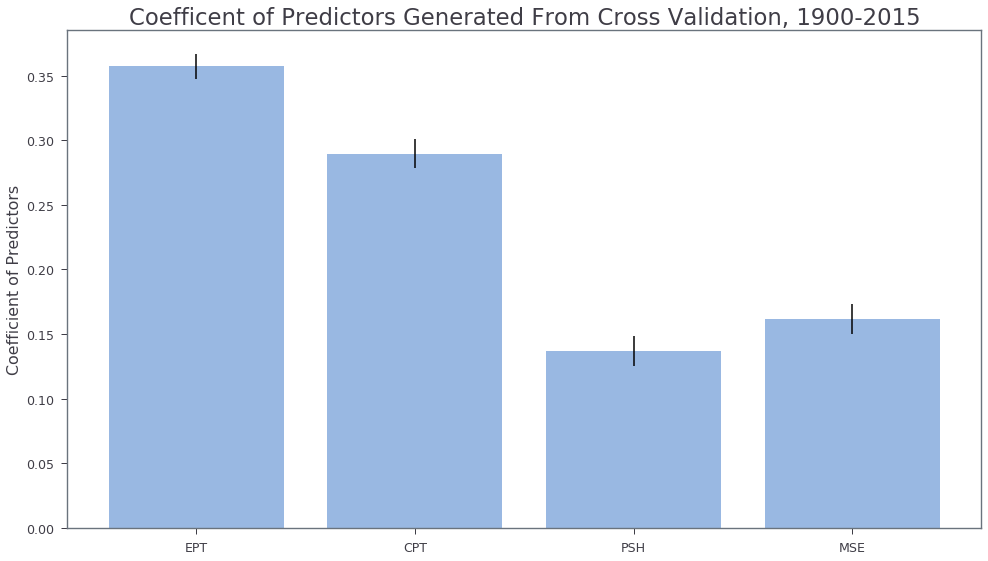

/global/home/users/medhap02/.conda/envs/xarrayenv2/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.


,Standard Deviation,Mean
EPT new,0.009551,0.357304
CPT new,0.010980,0.289780
PSH new,0.011570,0.136769
MSE new,0.011590,0.161671


In [269]:
predictors = ['EPT', 'CPT', 'PSH', 'MSE']
x_pos = np.arange(len(predictors))
CTEs = [EPTregressionmean, CPTregressionmean, PSHregressionmean, MSEregressionmean]
error = [EPTregressionstd, CPTregressionstd, PSHregressionstd, MSEregressionstd]


fig, ax = plt.subplots(figsize=(14,8))
ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Coefficient of Predictors', fontsize = 'large')
ax.set_xticks(x_pos)
ax.set_xticklabels(predictors)
ax.set_title('Coefficent of Predictors Generated From Cross Validation, 1900-2015',fontsize = 'xx-large')

# Save the figure and show
plt.tight_layout()
#plt.savefig('bar_plot_with_error_bars.png')
plt.show()
pd.DataFrame.from_items([('EPT new', EPTmodel), ('CPT new', CPTmodel), ('PSH new', PSHmodel), ('MSE new', MSEmodel)], orient='index', columns=['Standard Deviation', 'Mean'])

# Model

In [270]:
AIRI = 0.357*EPTnew + 0.290*CPTnew + 0.137*PSHnew + 0.162*MSEnew
AIRI

<xarray.DataArray (time: 88)>
array([-1.294459e-01, -6.309176e-01,  2.716872e-01, -1.524944e+00,
       -1.884711e+00,  3.744950e-01, -2.219097e-01,  4.207411e-02,
       -1.048729e-02, -1.128181e+00,  3.047009e-01, -7.316432e-01,
       -2.058941e-01,  5.286974e-01, -4.505470e-01, -2.353757e-01,
       -3.389609e-01, -6.261504e-01, -1.565733e-01,  4.950158e-01,
        1.166810e-02,  4.901095e-01, -2.976755e-02, -4.052431e-01,
        6.005720e-01,  5.352482e-01, -9.860029e-01, -3.006321e-01,
        3.398052e-01,  6.320474e-01, -1.761221e-01,  8.147763e-02,
        1.153309e+00, -5.251291e-01,  4.373171e-01, -3.796004e-01,
        7.377502e-01,  7.305597e-01,  8.139345e-01, -4.984545e-01,
        2.501763e-01, -1.845678e-02,  3.244962e-01,  6.928798e-01,
        1.667197e-01, -5.676934e-01,  1.198647e+00, -9.288552e-01,
       -3.563841e-01, -6.804478e-02, -4.980554e-01,  5.429790e-01,
        7.724006e-01,  8.037298e-01, -3.223706e-01,  6.584964e-01,
       -4.199298e-01,  9.541017e

In [271]:
precip_jjas.time.data = EPT.time.data
rainfallmean = precip_jjas.mean()
rainfallstd = precip_jjas.std()

final = (AIRI * rainfallstd) + rainfallmean
print(final)

<xarray.DataArray (time: 88)>
array([-1.694083e+01, -4.916833e+01,  8.838330e+00, -1.066237e+02,
       -1.297444e+02,  1.544536e+01, -2.288309e+01, -5.917951e+00,
       -9.295853e+00, -8.112536e+01,  1.095998e+01, -5.564154e+01,
       -2.185383e+01,  2.535530e+01, -3.757666e+01, -2.374849e+01,
       -3.040548e+01, -4.886196e+01, -1.868419e+01,  2.319073e+01,
       -7.872018e+00,  2.287542e+01, -1.053492e+01, -3.466516e+01,
        2.997438e+01,  2.577630e+01, -7.198818e+01, -2.794225e+01,
        1.321599e+01,  3.199718e+01, -1.994051e+01, -3.385650e+00,
        6.549650e+01, -4.236974e+01,  1.948267e+01, -3.301722e+01,
        3.879026e+01,  3.832815e+01,  4.368630e+01, -4.065547e+01,
        7.455914e+00, -9.808019e+00,  1.223214e+01,  3.590662e+01,
        2.092502e+00, -4.510517e+01,  6.841020e+01, -6.831554e+01,
       -3.152520e+01, -1.299483e+01, -4.062983e+01,  2.627312e+01,
        4.101709e+01,  4.303049e+01, -2.933930e+01,  3.369695e+01,
       -3.560902e+01,  5.269427e

In [272]:
AIRI2 = 0.475*EPTnew + 0.432*CPTnew + 0.386*PSHnew + 0.301*MSEnew
AIRI2

final2 = (AIRI2 * rainfallstd) + rainfallmean
print(final2)

<xarray.DataArray (time: 88)>
array([ -39.983493,  -69.673018,    2.120259, -155.097852, -209.703454,
          5.566828,  -62.794335,   -3.926726,  -14.289702, -133.123919,
         20.994545, -104.058185,  -61.221661,   57.461239,  -50.386227,
        -50.176342,  -40.509791,  -72.15336 ,  -24.285477,   41.757069,
        -26.796805,   56.369543,  -10.717797,  -52.343318,   33.246951,
         47.020245, -100.531603,  -30.304754,   37.365901,   74.775889,
        -17.781957,    5.885937,  109.047938,  -65.667598,   42.532421,
        -18.630166,   80.678449,   53.484366,   52.76053 ,  -68.225927,
         11.234197,  -17.131145,    9.4214  ,   68.337229,    2.485666,
        -76.981782,  113.676209,  -95.438164,  -35.363739,  -24.021767,
        -52.329559,   55.972691,   81.422245,   77.01653 ,  -30.114905,
         71.714174,  -37.802739,   86.996629, -113.525285,  -16.1782  ,
        -91.693755,   53.51028 ,   37.885939,  -32.72966 , -107.156784,
         55.842827,   25.750216,  

In [273]:
finalcorrelation = correlation(final, precip_jjas, dims='time')
print("multiple linear regression")
print("correlation between final and precipitation", finalcorrelation.data)
print()
finalcorrelation2 = correlation(final2, precip_jjas, dims='time')
print("multiple linear regression")
print("correlation between final and precipitation", finalcorrelation2.data)

multiple linear regression
correlation between final and precipitation 0.629668738350154

multiple linear regression
correlation between final and precipitation 0.6194289152916551


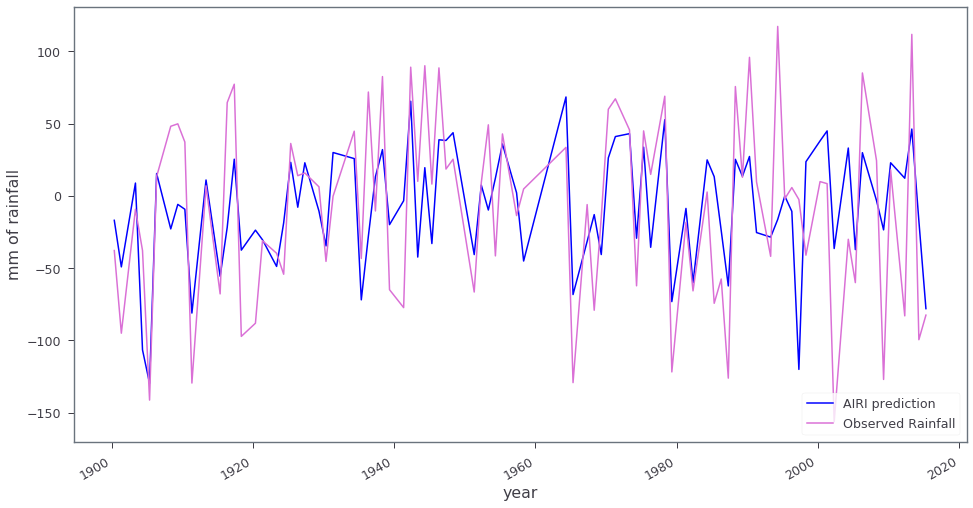

In [274]:
final.plot(label = 'AIRI prediction', color = 'blue')
precip_jjas.plot(label = 'Observed Rainfall', color = 'orchid')
#plt.hlines(precip_jjas.sel(time.year = ('1900-01-01','2015-12-31')).mean(), 1900, 2015, linestyles='dashed',colors='blue')
plt.xlabel('year', fontsize = 'large')
plt.ylabel('mm of rainfall', fontsize = 'large')
plt.legend(loc='lower right')

In [ ]:
# Copyright (c) 2020 Medha Palavalli.